### Assignment

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

In [151]:
df = pd.read_csv('C:/Users/rosyi/Videos/Machine Learning/Day 7. Data Visualization in Python I/telco_customer_churn.csv')
df2 = pd.read_csv('C:/Users/rosyi/Videos/Machine Learning/Day 7. Data Visualization in Python I/apartment_data.csv')

df3 = sns.load_dataset("penguins")
df3 = df3.dropna().reset_index(drop = True)

#### Soal
1. Data: Telco Customer Churn (df)

    a. Gambarlah histogram dari kolom 'Tenure', dan pisahkan dengan warna berdasarkan Churn. Namun, pada visualisasi tersebut, tambahkan pula 'Density Plot' di atas Histogram sehingga hasil akhir visualisasinya menjadi seperti yang terlihat pada Slide. 

    b. Buatlah Stacked Bar Chart yang memperlihatkan rasio dari kolom 'InternetService' terhadap customer-customer yang Churn dan Non Churn. 
    
    c. Jawablah pertanyaan ini: bagi customer yang Churn, kebanyakan dari mereka memiliki InternetService tipe apa? 

2. Data: Apartment Data (df2)

    a. Buatlah sebuah bar plot di mana sumbu-x adalah kolom `Bathroom`, dan sumbu-y adalah kolom `AnnualPrice` (yang dirata-ratakan menurut kolom `Bathroom`). Jadi, kita ingin melihat, berapa `AnnualPrice` rata-rata untuk apartement yang memiliki 0, 1, 2, 3 `Bathroom`. 
    
    b. Jawablah pertanyaan ini: apartment dengan berapa kamar mandi yang memiliki rata-rata Annual Price paling tinggi?

3. Data: Penguins (df3)

    a. Buatlah visualisasi scatterplot menggunakan Sub Plots (materi Day 8). Terdapat 2 Sub Plots yang akan dibuat, dengan ketentuan berikut:
    - Terdapat 2 scatterplot. Posisi subplots adalah 1 kolom dan 2 baris. Artinya, kedua scatterplot yang akan kita gambar akan saling tumpuk-menumpuk (ada yang di atas, ada yang di bawah). 
    - Scatterplot pertama: sumbu-x: `body_mass_g`, sumbu-y: `flipper_length_mm`
    - Scatterplot kedua: sumbu-x: `body_mass_g`, sumbu-y: `bill_length_mm`
    - Scatterplot diberi warna berdasarkan kolom `island`. Terserah menggunakan color palette apa pun.
    - Gantilah nama dari masing-masing sumbu sehingga lebih menarik dan enak dibaca (tidak di-set default)
    - Berilah judul dari visualisasi yang dibuat (bebas, asal jangan kosong)
    
   b. Jawablah pertanyaan berikut: Variabel `body_mass_g` lebih baik digunakan untuk memprediksi variabel `flipper_length_mm`, atau `bill_length_mm`? 

### Jawaban:

##### Nomor 1a

In [166]:
# See five data in every column
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


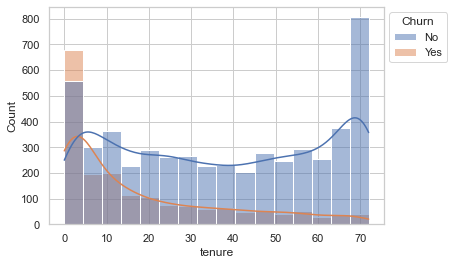

In [153]:
# Create figure and axes
fig = plt.figure()
ax = plt.axes()

# Create barplot and density plot in one figure
ax = sns.histplot(data = df, x = 'tenure', hue = 'Churn', kde = True)
sns.move_legend(ax, 'best', bbox_to_anchor=(1,1))  #legend
plt.show()

##### Nomor 1b:

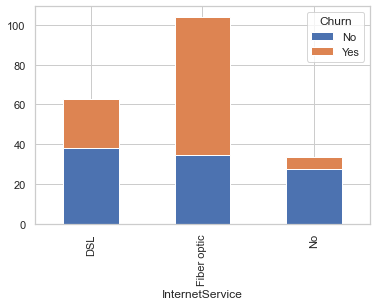

In [154]:
# Create crosstab for ratio comparison
pd.crosstab(df['InternetService'], df['Churn']).apply(lambda x: x*100/x.sum())

# Create stacked bar graph from the crosstab
pd.crosstab(df['InternetService'], df['Churn']).apply(lambda x: x*100/x.sum()).plot(kind = 'bar', stacked = True)
plt.show()

##### Nomor 1c:
Bagi customer yang Churn, paling banyak mereka menggunakan internet **Fiber Optic**.

#### Nomor 2a:

In [106]:
# Knowing how many bathrooms are offered from each apartment and the amount of data.
df2.groupby('Bathroom').size()

Bathroom
0       6
1    1175
2     273
3      46
dtype: int64

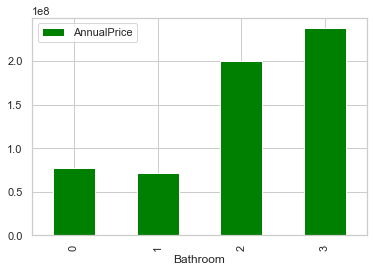

In [108]:
# Make a barplot to find out the average of AnnualPrice for an apartment that has 0, 1, 2, 3 Bathroom
df2.groupby('Bathroom').agg({'AnnualPrice':'mean'}).plot(kind = 'bar', color = 'green')
plt.show()

##### Nomor 2b:
Unit Apartment dengan **3** Kamar Mandi memiliki rata-rata Annual Price paling tinggi. 

##### Nomor 3a:

In [119]:
# See five data in every column
df3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [124]:
# find out how many islands are in the data along with their names.
df3.groupby('island').size()

island
Biscoe       163
Dream        123
Torgersen     47
dtype: int64

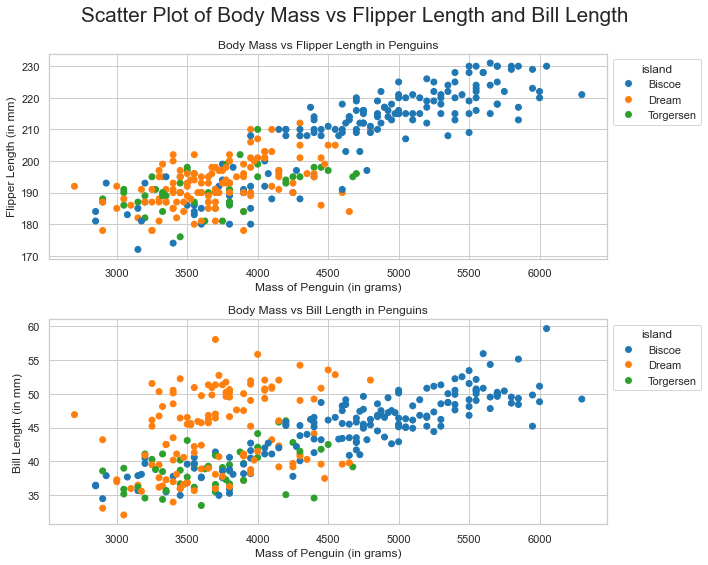

In [164]:
from matplotlib.lines import Line2D

# Create subplots between body mass vs flipper length and body mass vs bill length
fig, (ax1, ax2) = plt.subplots(2, figsize = (10,8))

colors = {'Biscoe':'tab:blue', 'Dream':'tab:orange', 'Torgersen':'tab:green'}

ax1.scatter(data = df3, x = 'body_mass_g', y = 'flipper_length_mm', c = df3['island'].map(colors))
ax1.set_title('Body Mass vs Flipper Length in Penguins')
ax1.set_xlabel('Mass of Penguin (in grams)')
ax1.set_ylabel('Flipper Length (in mm)')

ax2.scatter(data = df3, x = 'body_mass_g', y = 'bill_length_mm', c = df3['island'].map(colors))
ax2.set_title('Body Mass vs Bill Length in Penguins')
ax2.set_xlabel('Mass of Penguin (in grams)')
ax2.set_ylabel('Bill Length (in mm)')

# create legend
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax1.legend(title='island', handles=handles, bbox_to_anchor=(1, 1), loc='best')
ax2.legend(title='island', handles=handles, bbox_to_anchor=(1, 1), loc='best')

fig.suptitle('Scatter Plot of Body Mass vs Flipper Length and Bill Length', fontsize = 'xx-large') #create Large title
plt.tight_layout() #anticipate the overlays between the figure
plt.show()

##### Nomor 3b:
Kolom `body_mass_g` lebih baik digunakan untuk memprediksi **Flipper Length**.